# BIKE SHARING MODEL

### Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### Business Goal:
Required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Process of Building the model

### Data preperation
 - Data quality checks
 - Categorical variables
 - Creation of Dummy variables
 - Data Cleaning
 - Deriving new matrics

### Model Building
 - Parameter tunning
 - Variable selection

### Model evaluation
 - Residual analysis
 - Model evaluation

In [1]:
#importing all the required libraries for the data processing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
#reading the data file and analysing the dataset

df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Data quality checks


In [43]:
import scipy.stats as stats

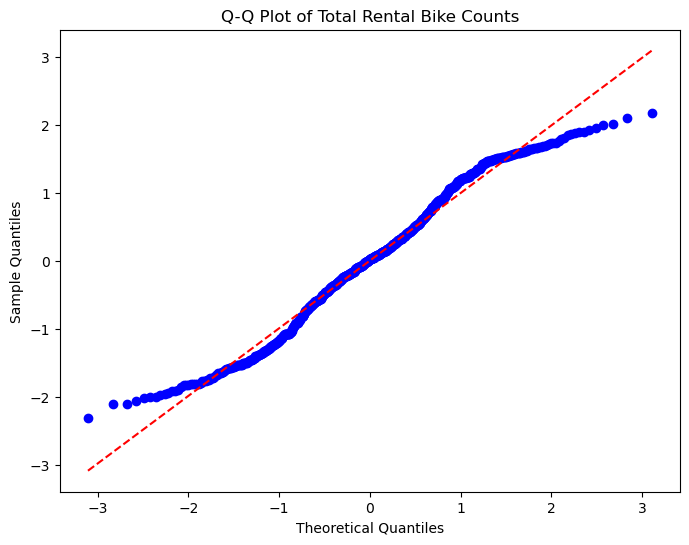

In [44]:
cnt_values = df['cnt']

# Generate a Q-Q plot
fig, ax = plt.subplots(figsize=(8, 6))
stats.probplot(cnt_values, dist="norm", plot=ax)
ax.get_lines()[1].set_linestyle('--')

ax.set_title('Q-Q Plot of Total Rental Bike Counts')
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Sample Quantiles')

# Show plot
plt.show()

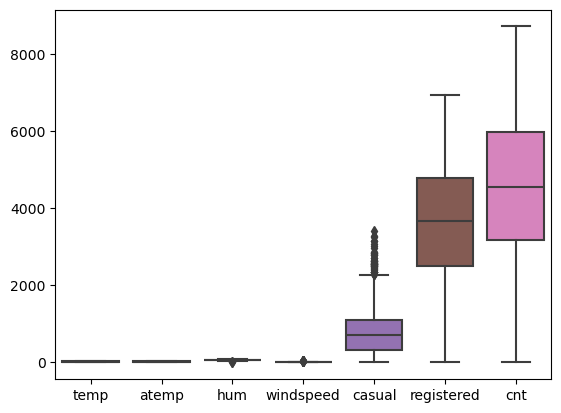

In [6]:
# Box plot for numerical columns
sn.boxplot(data=df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']])
plt.show()

#Using box plots to identify outliers in numerical columns

Scaling the outlier in the data
From the boxplot it is identified that the casual, registered and the cnt
have higher value than the other so using standarscaler and minmaxscaler to scale the data

In [7]:
#importing required libraries for the scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

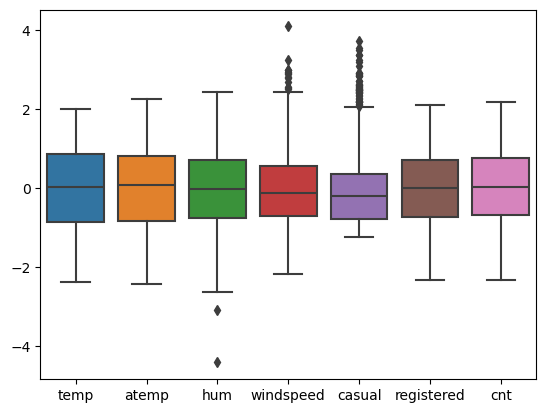

In [8]:
numerical_datas = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

scaler = StandardScaler()
df[numerical_datas] = scaler.fit_transform(df[numerical_datas])

sn.boxplot(data=df[numerical_datas])
plt.show()

In [9]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,-0.827613,-0.680818,1.252343,-0.387833,-0.755455,-1.927745,-1.820972
1,2,02-01-2018,1,0,1,0,0,0,2,-0.722069,-0.741507,0.480996,0.748899,-1.046996,-1.917480,-1.916078
2,3,03-01-2018,1,0,1,0,1,1,1,-1.635432,-1.750344,-1.338073,0.745931,-1.063031,-1.558846,-1.632827
3,4,04-01-2018,1,0,1,0,2,1,1,-1.615560,-1.610886,-0.261577,-0.389769,-1.080523,-1.414494,-1.522732
4,5,05-01-2018,1,0,1,0,3,1,1,-1.468226,-1.505615,-1.340294,-0.046477,-1.118424,-1.373434,-1.503090


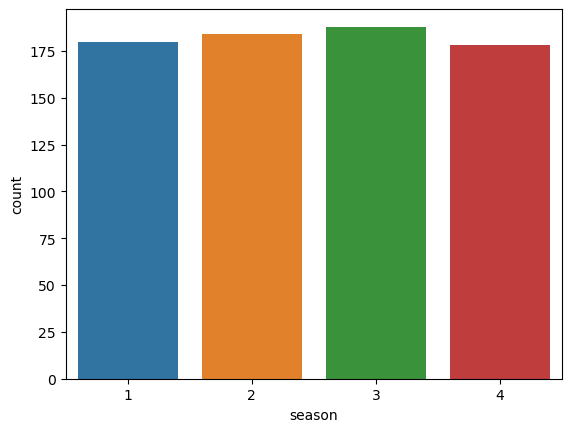

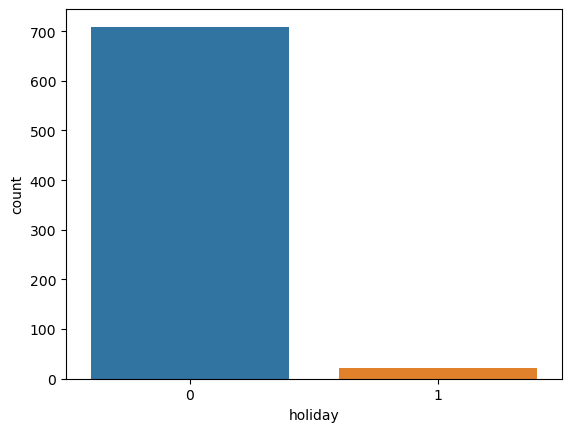

In [10]:
# Count plot for categorical variables
sn.countplot(x='season', data=df)
plt.show()

sn.countplot(x='holiday', data=df)
plt.show()

In [11]:
#converting the date string into datetime 
df['dteday'] = df['dteday']
df['dteday'] = pd.to_datetime(df['dteday'], format="%d-%m-%Y")

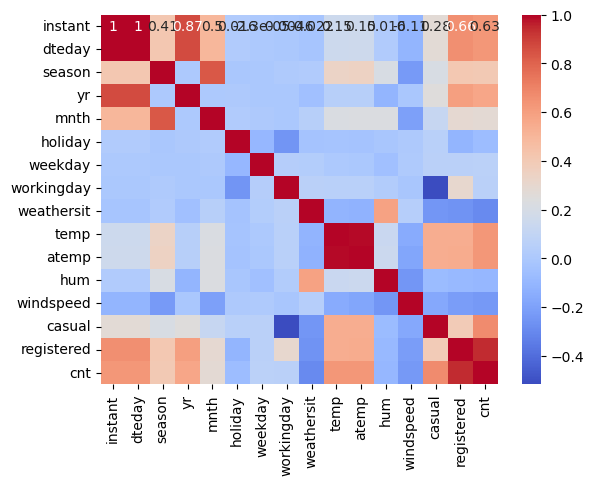

In [12]:
correlation_matrix = df.corr()

# Heatmap for correlation matrix
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

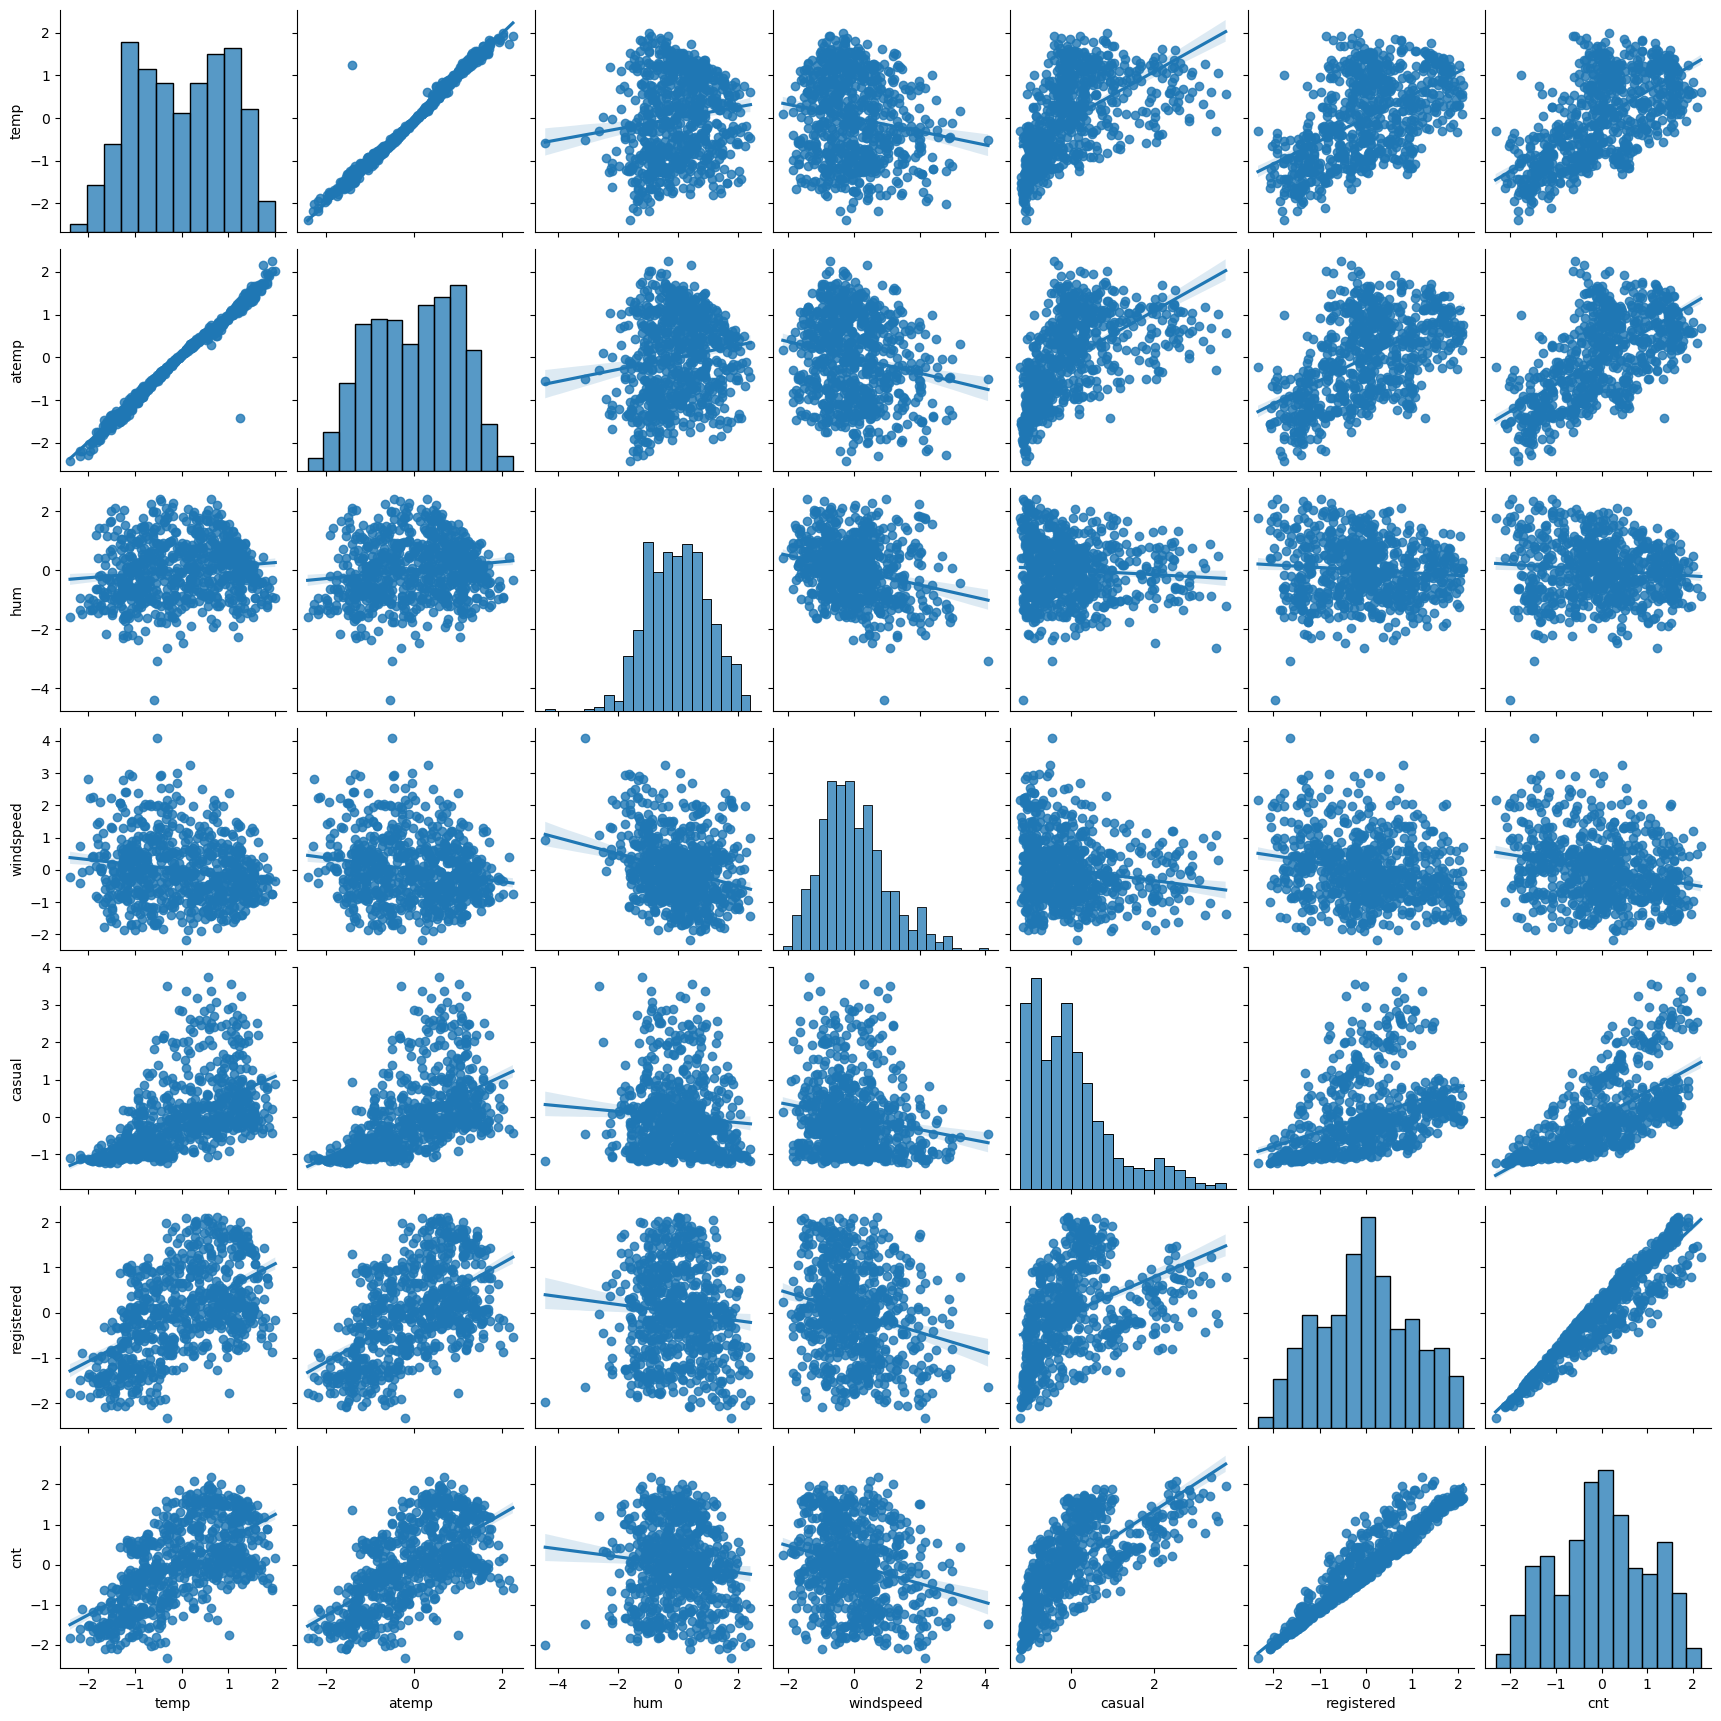

In [13]:
#regression plot analysis
import warnings
warnings.filterwarnings("ignore")

sn.pairplot(data=df[numerical_datas], kind='reg')
plt.plot

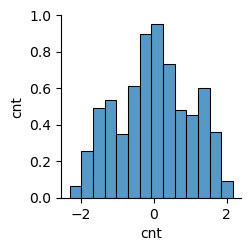

In [14]:
datedata = ['dteday', 'cnt']
sn.pairplot(data=df[datedata], kind='reg')
plt.show()

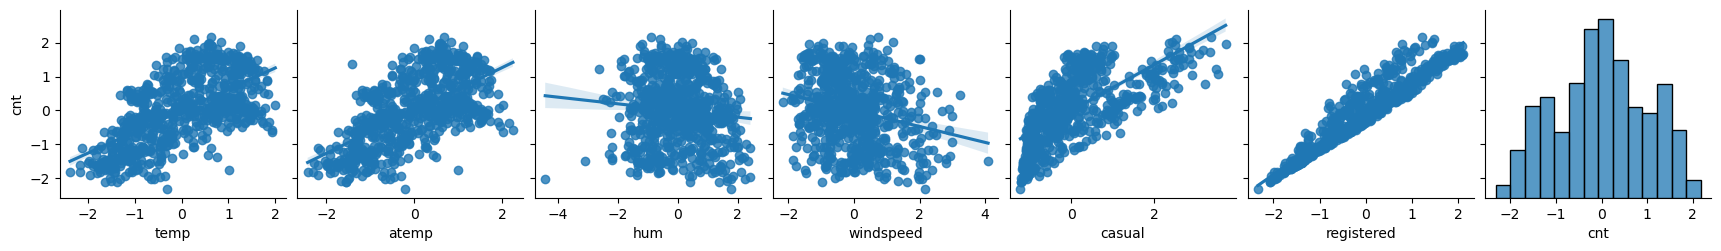

In [15]:
#analysing the relation between the numerical fields and the cnt

sn.pairplot(data=df[numerical_datas], y_vars=['cnt'], kind='reg')

In [16]:
month_dummy_columns = [col for col in df.columns if col.startswith('month_')]

# Drop the month dummy variables from the DataFrame
df = df.drop(month_dummy_columns, axis=1)

In [17]:
#Adding dummy values

season_values = pd.get_dummies(df['season'], prefix='season', drop_first=True)
df = pd.concat([df, season_values], axis=1)

weekday_value = pd.get_dummies(df['weekday'], prefix='day', drop_first=True)
df = pd.concat([df, weekday_value], axis=1)
df.head(100)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,cnt,season_2,season_3,season_4,day_1,day_2,day_3,day_4,day_5,day_6
0,1,2018-01-01,1,0,1,0,6,0,2,-0.827613,...,-1.820972,False,False,False,False,False,False,False,False,True
1,2,2018-01-02,1,0,1,0,0,0,2,-0.722069,...,-1.916078,False,False,False,False,False,False,False,False,False
2,3,2018-01-03,1,0,1,0,1,1,1,-1.635432,...,-1.632827,False,False,False,True,False,False,False,False,False
3,4,2018-01-04,1,0,1,0,2,1,1,-1.615560,...,-1.522732,False,False,False,False,True,False,False,False,False
4,5,2018-01-05,1,0,1,0,3,1,1,-1.468226,...,-1.503090,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,2018-04-06,2,0,4,0,3,1,1,-0.572560,...,-0.878699,True,False,False,False,False,True,False,False,False
96,97,2018-04-07,2,0,4,0,4,1,1,-0.317501,...,-0.706578,True,False,False,False,False,False,True,False,False
97,98,2018-04-08,2,0,4,0,5,1,2,-0.873163,...,-1.569768,True,False,False,False,False,False,False,True,False
98,99,2018-04-09,2,0,4,0,6,0,2,-0.836724,...,-1.061158,True,False,False,False,False,False,False,False,True


In [18]:
df['cnt']

0     -1.820972
1     -1.916078
2     -1.632827
3     -1.522732
4     -1.503090
         ...   
725   -1.237414
726   -0.730355
727   -1.636962
728   -1.401782
729   -0.919533
Name: cnt, Length: 730, dtype: float64

In [19]:
exception_columns = ['dteday', 'cnt']

# Convert all boolean columns to integers (1 for True, 0 for False) except 'dteday'
df.loc[:, ~df.columns.isin(exception_columns)] = df.loc[:, ~df.columns.isin(exception_columns)].applymap(lambda x: 1 if x else 0)

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,cnt,season_2,season_3,season_4,day_1,day_2,day_3,day_4,day_5,day_6
0,1,2018-01-01,1,0,1,0,1,0,1,1.0,...,-1.820972,0,0,0,0,0,0,0,0,1
1,1,2018-01-02,1,0,1,0,0,0,1,1.0,...,-1.916078,0,0,0,0,0,0,0,0,0
2,1,2018-01-03,1,0,1,0,1,1,1,1.0,...,-1.632827,0,0,0,1,0,0,0,0,0
3,1,2018-01-04,1,0,1,0,1,1,1,1.0,...,-1.522732,0,0,0,0,1,0,0,0,0
4,1,2018-01-05,1,0,1,0,1,1,1,1.0,...,-1.503090,0,0,0,0,0,1,0,0,0


In [20]:
df['cnt']

0     -1.820972
1     -1.916078
2     -1.632827
3     -1.522732
4     -1.503090
         ...   
725   -1.237414
726   -0.730355
727   -1.636962
728   -1.401782
729   -0.919533
Name: cnt, Length: 730, dtype: float64

## RFE Variable selection

In [21]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [22]:
df.shape

(730, 25)

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [37]:
X = df.drop(['cnt', 'dteday'], axis=1)
y = df['cnt']

#creating the sklearn model
model = LinearRegression()

#RFE Feature selection
rfe = RFE(model, n_features_to_select=20)

X_selected = rfe.fit_transform(X, y)

selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp',
       'atemp', 'hum', 'windspeed', 'casual', 'season_2', 'season_3',
       'season_4', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6'],
      dtype='object')


In [38]:
df.shape

(730, 25)

In [39]:
#preparing dataset for model training and testing

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

y_train.head(100)

683    0.484313
645    0.501370
163    0.264639
360   -1.729484
640    1.583717
         ...   
278    0.132835
116   -0.328739
228    0.096136
411   -0.776874
362   -1.077698
Name: cnt, Length: 100, dtype: float64

In [40]:
#trainig the model

model.fit(X_train, y_train)

LinearRegression()

## Model analysis

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
y_pred = model.predict(X_test)

#mean square error evaluation
mse = mean_squared_error(y_test, y_pred)

#R2 score evaluation
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 0.33945112076598366
R-squared Score: 0.6575806248408288


## Creating model with StatsModels

In [30]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Add a constant term to the features matrix (required for statsmodels)
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model using statsmodels: The Ordinary Least Squares (OLS) method is used to fit the linear regression model to the training data.
model = sm.OLS(y_train, X_train)
results = model.fit()

# Print the summary of the regression
print(results.summary())

# Make predictions on the testing set
y_pred = results.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     103.4
Date:                Tue, 12 Mar 2024   Prob (F-statistic):          3.63e-128
Time:                        16:16:15   Log-Likelihood:                -514.55
No. Observations:                 584   AIC:                             1053.
Df Residuals:                     572   BIC:                             1106.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
instant       -0.1726      0.008    -21.666      0.0

## Model analysis using the OLS Summary

- R-Squared is 0.665 this indicates that the model fits on the 66.5% of data
- Prob (F-statistic) is 3.63e-128, which is a higher value indicating that the model have is significant

